# 문제
## TIOBE라는 소프트웨어 코드 품질을 관리하는 회사에서 주기적으로 발표하는 컴퓨터 언어 순위가 있습니다.
-  이를 많은 사람들이 인용하면서 TIOBE INDEX라고도 불립니다.
-  최근의 발표에 따르면 가장 인기있는 언어는 Python입니다.
-  보다 하드웨어 친화적이고 빌드 후 실행시 효율이 높은 언어인 C는 2위,C의 상위 버전으로 인식되는 C++은 4위입니다.
-  거의 하드웨어 조립에 가까운 느낌이 드는 어셈블리도 10위에 있습니다.
-  Java와 JavaScript는 각각 3위, 7위입니다.
-  통계 전용 언어에서 데이터사이언스의 부각으로 각광받았지만 Python의 부상으로 인기가 조금 하락한 R도 14위에 있습니다.
- 이런 TIOBE INDEX에 맞춰 또 하나 관찰해볼만한 것은 출판되는 책의 양입니다.
-  각 언어별 출판되는 책의 양을 확인하면 역시 인기도를 실감할 수 있지 않을까요?
-  여러분들은 출판된 책의 데이터를 얻는 다양한 방법을 알고 있습니다.
-  이번 과제는 한국에서 출판된 프로그래밍 언어 책의 정보를 수집해서 가장 인기 있는 언어를 출판책 기준으로 확인해보는 것입니다.

---

## 문제1)
### 과제 설명 첫 두 페이지에 제시한 TIOBE INDEX의 상위 9개 언어에 R(14위)까지해서 총 10개 언어에 대해 출판책 정보를 수집하세요.

In [597]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import set_matplotlib_hangul
import urllib.request
import datetime
import json

from tqdm import tqdm
%matplotlib inline

In [598]:
client_id = "MadIM69g5849lC6DDC_5" 
client_secret = "ipBAFSsbIT" 

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/book?query=" + encText 

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [599]:
def gen_search_url(api_node, search_text, start_num, disp_num): #찾을 url 생성(generate)
    base = "https://openapi.naver.com/v1/search/"
    node = "/"+ api_node + ".json"
    param_query = "?query="+urllib.parse.quote(search_text)
    param_start = "&start="+str(start_num)
    param_disp = "&display=" + str(disp_num)

    return base+node+param_query+param_start+param_disp

In [600]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url) #요청할 url
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)
    #print("[%s] Url Request Success"% datetime.datetime.now()) #현재 시간 찍기
    return json.loads(response.read().decode("utf-8"))

In [601]:
#url = gen_search_url("book","파이썬",1,5) #1번부터 시작 , 5개 보여줘
#one_result = get_result_onpage(url)
#one_result

In [602]:
#one_result['items']

In [603]:
#one_result["items"][0]

In [604]:
#import pandas as pd
def get_fields(json_data,language):
    title = [each["title"].replace("<b>"," ").replace("</b>"," ") for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    image = [each["image"] for each in json_data["items"]]
    author = [each["author"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    discount = [each["discount"] for each in json_data["items"]]
    publisher = [each["publisher"].replace("<b>"," ").replace("</b>"," ") for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    description = [each["description"].replace("<b>"," ").replace("</b>"," ") for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "language":language[0],
        "title":title,
        "link":link,
        "image":image,
        "author":author,
        "price":price,
        "discount":discount,
        "publisher":publisher,
        "pubdate":pubdate,
        "isbn":isbn,
        "description":description
    }, 
    columns=["language","title","link","image","author","price","discount","publisher","pubdate","isbn","description"])
    return result_pd

In [605]:
from tqdm import tqdm
def SearchBooks(languages):
    result_book = []
    for language in tqdm(languages):
        for lan in language:
            #print(language)
            for n in range(1,1000,20):
                url = gen_search_url("book", lan, n,20) #n페이지부터 20개 ( 1~ 20, 21~40)
                json_result = get_result_onpage(url) #받은 내용을 json으로 넣기
                pd_result = get_fields(json_result,language) #데이터 프레임으로 바꾸기

                result_book.append(pd_result)
    result_book = pd.concat(result_book)

    #index 수정
    result_book.reset_index(drop=True,inplace=True)
    #result_book["price"] = result_book["price"].astype("float")
    #result_book["discount"] = result_book["discount"].astype("float")
    
    # #excel 저장
    # writer = pd.ExcelWriter("./"+languages[0]+".xlsx",engine="xlsxwriter")
    # result_book.to_excel(writer, sheet_name="Sheet1")
    # workbook = writer.book 
    # worksheet = writer.sheets["Sheet1"]
    # writer.save()
    return result_book

In [606]:
languages = [ ["Python","파이썬","파이선"] ,["C언어"],["JAVA","Java"],["C++"],["C#"],["Visual Basic"],["JavaScript","자바스크립트"],["SQL"],["PHP"],["R언어","R 데이터"]]

In [607]:
result_book = SearchBooks(languages)
result_book.head()

100%|██████████| 10/10 [02:31<00:00, 15.19s/it]


,language,title,link,image,author,price,discount,publisher,pubdate,isbn,description
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/168/...,브렛 슬라킨 지음|오현석,32000,28800,길벗,20201030,1165213192 9791165213190,"아마존 파이썬 프로그래밍 분야 베스트셀러, 〈Effective Python 〉 전..."
1,Python,파이썬 딥러닝 파이토치( Python Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/167/...,이경택|방성수|안상준,25000,22500,정보문화사,20201008,8956748578 9788956748573,파이썬은 선택이 아닌 필수! 파이토치로 딥러닝 입문하기!이 책은 딥러닝 기술에 초점...
2,Python,Intuitive Python : Productive Development for...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/206/...,MULLER|David,38060,,PragmaticBookshelf,20211005,1680508237 9781680508239,Developers power their projects with Python ...
3,Python,Python 으로 시작하는 빅데이터분석 및 인공지능 (개정판),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/180/...,조준모,26000,25500,인피니티북스,20210225,118557879X 9791185578798,이를 위해 현재 각광을 받고 있는 구글의 주피터 노트북(JUPYTER NOTEBOO...
4,Python,"Fluent Python : Clear, Concise, and Effective...",http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/207/...,Ramalho|Luciano,99730,,O'ReillyMedia,20211019,1492056359 9781492056355,Python 's simplicity lets you become producti...


In [608]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language     14055 non-null  object
 1   title        14055 non-null  object
 2   link         14055 non-null  object
 3   image        14055 non-null  object
 4   author       14055 non-null  object
 5   price        14055 non-null  object
 6   discount     14055 non-null  object
 7   publisher    14055 non-null  object
 8   pubdate      14055 non-null  object
 9   isbn         14055 non-null  object
 10  description  14055 non-null  object
dtypes: object(11)
memory usage: 1.2+ MB


In [609]:
# 책 제목에서 관련없는 내용을 삭제하는 코드
result_book.reset_index(drop=True,inplace=True) 
titles = [ "Python","python","PYTHON","파이썬","파이선","C","자바","JAVA","Java","java","Visual Basic","JavaScript","javascript","자바스크립트","SQL","sql","PHP","php","R"]
limit = len(titles)
for i in range(len(result_book)):
    cnt = 0
    for title in titles:
        if title in result_book.loc[i,"title"]:
            continue
            print(result_book.loc[i,"title"])
        else : 
            cnt+=1
    if cnt == limit:
        result_book =  result_book.drop(i,0)
        #print(result_book.loc[i,"title"])
    

C:\Users\82103\AppData\Local\Temp/ipykernel_20412/46725004.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  result_book =  result_book.drop(i,0)


In [610]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12078 entries, 0 to 14053
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language     12078 non-null  object
 1   title        12078 non-null  object
 2   link         12078 non-null  object
 3   image        12078 non-null  object
 4   author       12078 non-null  object
 5   price        12078 non-null  object
 6   discount     12078 non-null  object
 7   publisher    12078 non-null  object
 8   pubdate      12078 non-null  object
 9   isbn         12078 non-null  object
 10  description  12078 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


In [611]:
import copy
copy_data = copy.deepcopy(result_book)

### 문제 1) 소결
- 네이버 검색 API를 사용하여 TIOBE INDEX 상위 9개 언어와 R언어에 대한 출판 책 정보를 수집하였다.
- "language" 컬럼을 이용하여 출판된 책이 관련된 언어를 정리하였다.
- 수집한 데이터는 result_book 변수에 저장하였다.

---

## 문제2)
### 전세계에서 간행되는 도서에 고유번호를 인가하여 문헌정보와 유통의 효율화를 기대하기 위해 부여되는 일종의
### 책의 ID 역할을 하는 ISBN 넘버가 있습니다. 문제1에서 수집한 데이터를 ISBN 정보로 unique 검사 후 중복데이터를 정리하세요.

In [612]:
len(result_book["isbn"].unique())

10207

In [613]:
result_book.drop_duplicates(["isbn"],inplace=True) #isbn 컬럼을 기준으로 중복된 값있으면 1개 제외하고 삭제

In [614]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10207 entries, 0 to 14052
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language     10207 non-null  object
 1   title        10207 non-null  object
 2   link         10207 non-null  object
 3   image        10207 non-null  object
 4   author       10207 non-null  object
 5   price        10207 non-null  object
 6   discount     10207 non-null  object
 7   publisher    10207 non-null  object
 8   pubdate      10207 non-null  object
 9   isbn         10207 non-null  object
 10  description  10207 non-null  object
dtypes: object(11)
memory usage: 956.9+ KB


### 문제 2) 소결
- drop_duplicates 메서드를 이용하여 중복된 "isbn" 컬럼 값을 가진 행을 1개만 남기고 삭제하였다.
- result_book.info()로 데이터를 확인한 결과
    - 총 13,055개 데이터 중 고유한 11,279개 데이터가 남았다. 즉( 1,776 개의 중복된 값이 삭제되었다)

---

## 문제3)
### 문제2의 결과에서 각 언어별 출판물의 양으로 순위를 매겨주세요. 이때 적절히 시각화하여 그 양도확인해주세요.

In [615]:
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul
%matplotlib inline

In [616]:
label = result_book["language"].unique()
label

array(['Python', 'C언어', 'JAVA', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R언어'], dtype=object)

In [617]:
pubCnt = result_book.groupby("language").count()
pubCnt.sort_values(by="title",ascending=False,inplace=True)
pubCnt = pubCnt["title"]

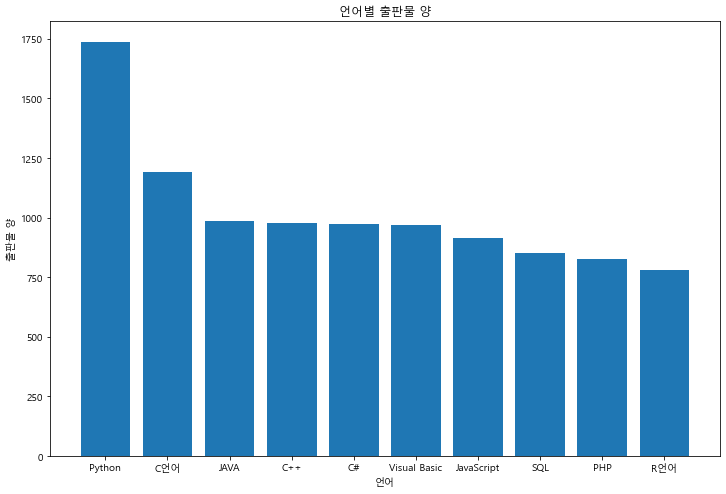

In [618]:
plt.figure(figsize=(12,8))
plt.bar(
    #np.arange(len(label)),
    label,
    pubCnt
)
plt.title("언어별 출판물 양")
plt.xlabel("언어")
plt.ylabel("출판물 양")
plt.show()

### 문제3) 소결
- groupby() 메서드를 이용하여 각 "language" 별로 데이터 갯수를 수집하였다.
- 수집한 데이터를 '출판물의 양'을 y축으로 하는 막대 그래프로 표현하였다.
- Python, C언어, JAVA 순으로 많게 출판된 것으로 보인다.

---

## 문제4)
### 수집된 정보를 기반으로 우리나라의 컴퓨터 언어 관련 출판사 순위를 확인해 주세요.

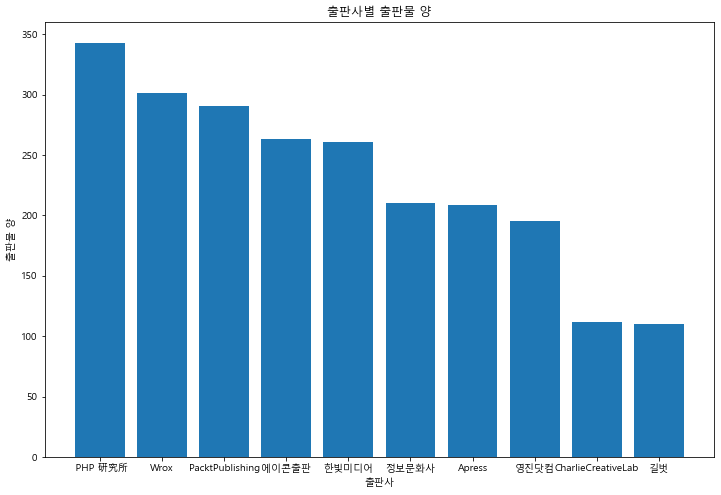

In [619]:
publisherCnt = result_book.groupby("publisher").count()
publisherCnt.sort_values(by="title",ascending=False,inplace=True)
publisherCnt = publisherCnt.iloc[0:10,:]["title"]
publisherCnt
label = publisherCnt.index
label
plt.figure(figsize=(12,8))
plt.bar(
    #np.arange(len(label)),
    label,
    publisherCnt
)
plt.title("출판사별 출판물 양")
plt.xlabel("출판사")
plt.ylabel("출판물 양")
plt.xticks(np.arange(0,10,step=1))
plt.show()

### 문제 4) 소결
- 출판사별로 출판한 양을 Y축으로 하는 막대그래프를 작성하였다.
- PHP硏究所,Wrox, PacktPublishing, 에이콘출판, 한빛미디어 순으로 출판양이 많은 것으로 보인다.

---

## 문제5)
### 수집된 정보에서 출판일 기준, 최근 2년간(20년, 21년) 데이터와 그 전 3년(17년, 18년, 19년) 데이터를 비교해주세요.
### 여기서 비교해야할 대상은 여러분들이 정하세요. 두 기간의 데이터를 관찰해서 특이한 사항들을 정리해주면 됩니다. 
### 이 과정에서 역시 적절한 시각화도 고민해 주세요.
### 특히 어떤 특정 언어의 변화가 감지되면 강조해주세요.

In [620]:
len(result_book.loc[result_book["pubdate"]==""]) #출판일 기재되어있지 않은 컬럼 갯수

4

In [621]:
result_book.drop(result_book.loc[ result_book["pubdate"]==""].index, inplace=True)
result_book.drop(result_book.loc[ result_book["pubdate"]=="June2002"].index, inplace=True)

In [622]:
result_book["출판년도"] = result_book["pubdate"].str[:4].astype(int)
result_book["최근2년/그전3년"] = [
    "최근2년" if yr>=2020 else "그전3년" if yr>=2017 else "2016년이전" for  yr in result_book["출판년도"] 
    ]
#result_book["최근2년/그전3년"] = result_book["최근2년/그전3년"].astype('category')

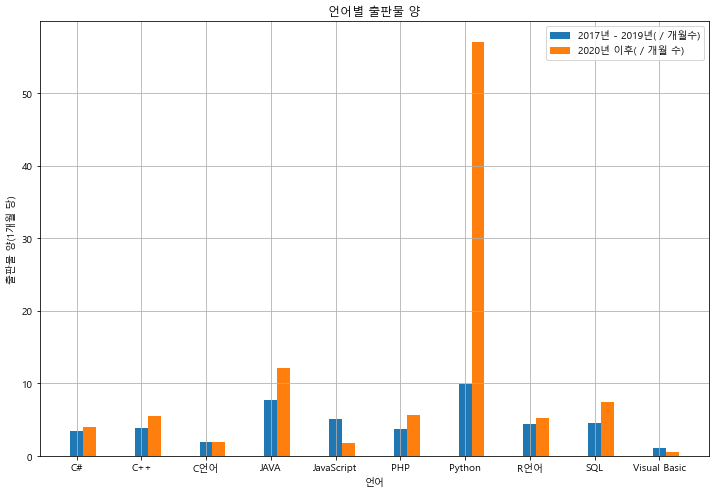

In [623]:
new_books = result_book[result_book["최근2년/그전3년"]=="최근2년"]
old_books = result_book[result_book["최근2년/그전3년"]=="그전3년"]
oldPubCnt = old_books.groupby("language").count()
oldPubCnt = oldPubCnt["title"]
newPubCnt = new_books.groupby("language").count()
newPubCnt = newPubCnt["title"]

#newPubCnt, oldPubCnt
x = np.arange(len(pubCnt.index))
label = newPubCnt.index
label
plt.figure(figsize=(12,8))
plt.bar(x,oldPubCnt/36,width=0.2,label="2017년 - 2019년( / 개월수)")
plt.bar(x+0.2,newPubCnt/22,width=0.2,label="2020년 이후( / 개월 수)")

plt.grid(True)
plt.title("언어별 출판물 양")
plt.xlabel("언어")
plt.ylabel("출판물 양(1개월 당)")
plt.xticks(x,label)
plt.legend()
plt.show()

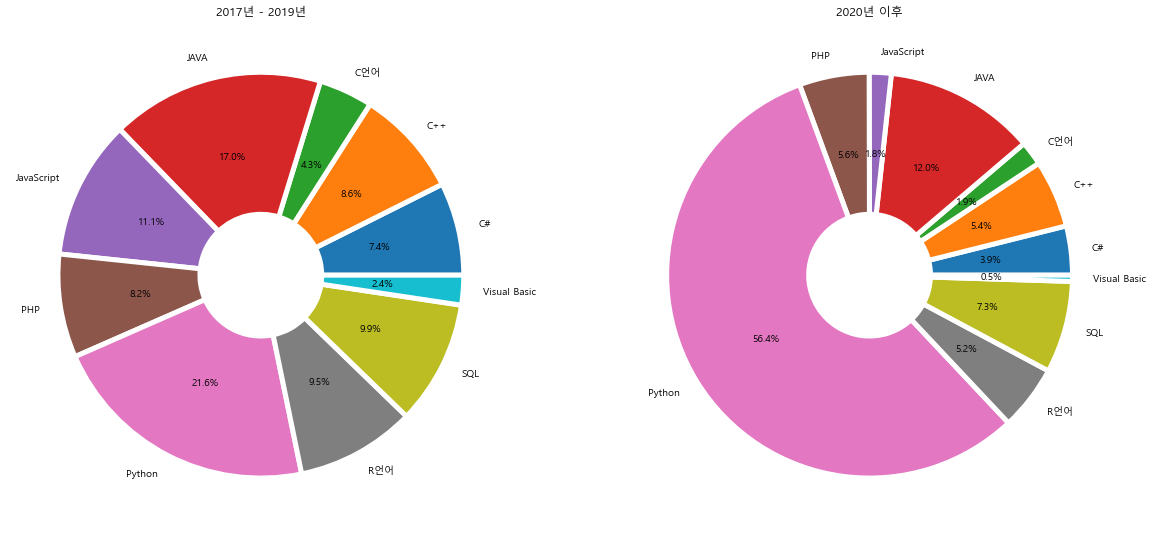

In [626]:
# 파이차트
plt.figure(figsize=(20,12),facecolor="white")

plt.subplot(1,2,1)
ratio = oldPubCnt
label = oldPubCnt.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("2017년 - 2019년")
plt.pie(ratio,labels=label,autopct='%.1f%%',wedgeprops=wedgeprops )

plt.subplot(1,2,2)
ratio = newPubCnt
label = newPubCnt.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("2020년 이후")
plt.pie(ratio,labels=label,autopct='%.1f%%',wedgeprops=wedgeprops )

plt.show()

### 문제 5) 소결
- 출판일을 기준으로 2017년 - 2019년도 출판물 양과 2020년이후 출판물 양을 비교하였다.
- 기간이 다르기 때문에 기간을 개월 수로 각각 나누어 주었다.
- 막대그래프에서 
    - Python 관련 출판물이 5배 이상 증가하였고,
    - Java관련 출판물도 상당량 증가하였다.
- 파이차트로 살펴보면
    - 2020년 이후 가장 비율이 높은 Python은 21.6% > 56.4% 로 비율이 2배이상 증가하였고, 2020년 이후에는 절반을 넘는 비율을 차지하고 있다
    - Java는 2017년-2019년 17.0%의 비율이었고 2020년 이후 12.0% 로 약 5% 하락하였으나 여전히 두번째로 높은 비율을 보인다.
    - JavaScript는 11.1% > 1.8%로 가장 비율이 크게 감소하였다.
- 결론
    - Python은 2020년 이전까지는 21.6%의 비중을 차지하고 있었으나, 2020년 이후 절반을 넘는 높은 비율을 차지하게 되었다.
    - JAVA는 비율로 볼 때는 5.7% 감소하였으나, 절대적인 출판물의 양(단위:개월수)으로 볼 때는 증가하는 모습을 보인다.
    - 막대 그래프로 살펴볼 때, 전반적으로 위 10개 언어의 절대적인 출판물의 양은 증가하였다.
        - JavaScript와 Visual Basic 2개 언어에 관한 출판물의 양은 절대적으로도 감소하였다.

---
---

## 추가과제
### 여러분들 수집한 책 목록을 먼저 TIOBE INDEX 20위까지 확장해서 검색해주세요.
- 검색할때 책 가격과 페이지수도 함께 수집해 주세요.
- 그리고 아래 질문에 답해주세요.
- 언어별 책의 가격은 어떤 특성이 있나요?
- 언어별 페이지수도 어떤 특성이 있나요?
- 페이지 수와 가격 사이에는 어떤 특성이 있나요?